In [1]:
"""
Problem 1.3

Repeat experiment (1) above, implementing the Ridge Regression method with 
various values of λ (instead of the Least Squares Method). Report whether you 
have observed an improvement of the Mean Square Error for some of the values of 
λ. 

The true components of the training vector: [0.2, -1, 0.9, 0.7, 0, -0.2]
The noise is white Gaussia, mean=0

"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from functions_problems_1a import *

In [2]:
"""
Predetermined parameters of the problem
"""
#True thetas
thetas = np.array([0.2, -1, 0.9, 0.7, 0, -0.2])

#True Degrees of the polynomial model
true_degrees_pol = 5

#Interval
lower_bound = 0
upper_bound = 2

degrees_pol = 5

#Total number of values from the interval
N = 20

In [3]:
"""
Create the training set
"""
#Create the training set
X = np.linspace(lower_bound, upper_bound, N)

#Create the polynomial matrix for X and add a column of ones
X_pol = X
for i in range(2,true_degrees_pol+1):
    X_pol = np.c_[X_pol, X**(i)]    #add the 5 polynomial degrees of each xi 
Phi_train = np.c_[np.ones((N,1)), X_pol]  #add x0 = 1 to each instance

noise_train = noise(0, 0.1**0.5, N)

y_train = y_vector(thetas, Phi_train)
y_train_noise = np.add(y_train,noise_train) # add noise on each yi

In [4]:
"""
Implement Ridge Regression for different lamdas
"""
#Ridge Regression: Calculate the best thetas using the training set
lambda_vector = np.linspace(0, 10, 1001) #the range in which λ takes values (0.01 step)
theta_train_matrix = np.zeros(Phi_train.shape[1])


#print(theta_train_matrix)
for l in lambda_vector:
    theta_train = ridge_regression(Phi_train, y_train_noise, l)
    theta_train_matrix = np.vstack((theta_train_matrix, theta_train))

theta_train_matrix = np.delete(theta_train_matrix, 0, axis = 0)

In [5]:
print(lambda_vector)

[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]


The Mean Square Error vector of y over the Training set for the different λ:  [0.06064338 0.06601255 0.06907412 ... 0.12221794 0.12225376 0.12228957]


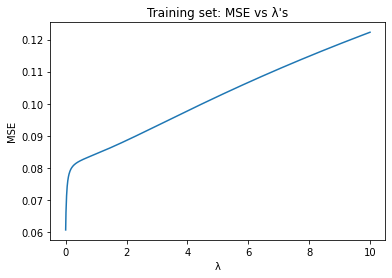

<Figure size 432x288 with 0 Axes>

In [6]:
"""
Training set
"""
#Predict new y using the calculated thetas
y_train_RR_matrix = np.zeros(Phi_train.shape[0])
for vector in theta_train_matrix:
    y_train_RR_vector = y_vector(vector, Phi_train)
    y_train_RR_matrix = np.vstack((y_train_RR_matrix, y_train_RR_vector))

y_train_RR_matrix = np.delete(y_train_RR_matrix, 0, axis = 0)

#Calculate the MSE
mse_train_matrix = mse(y_train_noise, y_train_RR_matrix, 1)
print("The Mean Square Error vector of y over the Training set for the different λ: ",mse_train_matrix)
plt.title("Training set: MSE vs λ's")
plt.plot(lambda_vector, mse_train_matrix, '-')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()
plt.show()
plt.savefig("1_2_b.png")

The Mean Square Error vector of y over the Test set for the different λ:  [0.12451294 0.11833776 0.11650016 ... 0.14673787 0.14677156 0.14680523]
Minimum MSE for test set:  0.11554946569536184 
Optimal lambda of test set:  0.06


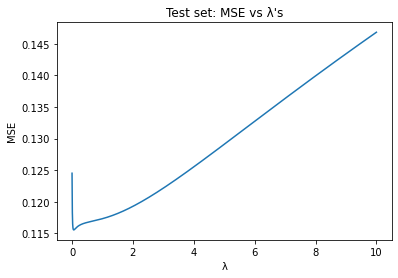

<Figure size 432x288 with 0 Axes>

In [10]:
"""
Test set
"""
#Test set comprising of 1000 points randomly selected in the interval [0,2].
N_test = 1000
X_test_initial = np.random.uniform(lower_bound, upper_bound, N_test)
#print(X_testing)

#Create the polynomial matrix for X_test and add a column of ones
X_test_pol = X_test_initial
for i in range(2,degrees_pol+1):
    X_test_pol = np.c_[X_test_pol, X_test_initial**(i)]    #add the 5 polynomial degrees of each xi 
X_test = np.c_[np.ones((N_test,1)), X_test_pol]  #add x0 = 1 to each instance

#Calculated the values of y from the true thetas and the X_test array
y_test = y_vector(thetas, X_test)

noise_vector_test = noise(0, 0.1**0.5, N_test)
y_test_noise = np.add(y_test, noise_vector_test)

#Predict the y from the test set
y_test_newthetas_matrix = y_vector(theta_train_matrix, X_test)

#Calculate the MSE
mse_test_matrix = mse(y_test_noise, y_test_newthetas_matrix, 1)
#print("The Mean Square Error vector of y over the Test set for the different λ: ",mse_test_matrix)

index_of_min_MSE = np.argmin(mse_test_matrix) #locate the  minimum MSE
min_MSE = mse_test_matrix[index_of_min_MSE] #Find the minimum MSE
optimal_lambda = lambda_vector[index_of_min_MSE] #save the optimal λ for the minimum MSE 
print('Minimum MSE for test set: ',str(min_MSE), '\nOptimal lambda of test set: ', str(optimal_lambda))
plt.title("Test set: MSE vs λ's")
plt.plot(lambda_vector, mse_test_matrix, '-')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()
plt.savefig("1_3_b.png")